In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [7]:
# read data
train_data = pd.read_csv('data/simplified_dataset/simplified_train_data_tokenized.csv')
test_data = pd.read_csv('data/simplified_dataset/simplified_test_data_tokenized.csv')

train_data = train_data.dropna(subset=['tokenized_review'])
test_data = test_data.dropna(subset=['tokenized_review'])

## word frequency

In [3]:
# string to vector
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data['tokenized_review'])
X_test = vectorizer.transform(test_data['tokenized_review'])
y_train = train_data['cat']
y_test = test_data['cat']

In [4]:
classifier = MultinomialNB()

# 訓練模型
classifier.fit(X_train, y_train)

# 預測
y_pred = classifier.predict(X_test)

# 評估
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
confusion = confusion_matrix(y_true, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.8680417297125109


## TF-IDF

In [14]:
tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='chinese')
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['tokenized_review'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['tokenized_review'])

In [18]:
classifier = MultinomialNB()

# 訓練模型
classifier.fit(X_train_tfidf, y_train)

# 預測
y_pred = classifier.predict(X_test_tfidf)

# 評估
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Confusion Matrix:\n", confusion)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

Best max_df: 0.1


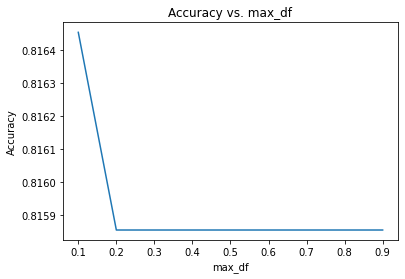

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

# 假设你有文本数据和对应的标签
X = train_data['tokenized_review']
y = train_data['cat']

# 创建TF-IDF向量化器
tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True)

# 初始化max_df的不同取值
max_df_values = np.arange(0.1, 1.0, 0.1)  # 从0.1到1.0以0.1为步长

# 用于存储交叉验证的结果
cv_scores = []

# 通过交叉验证尝试不同的max_df值
for max_df in max_df_values:
    tfidf_vectorizer.set_params(max_df=max_df)
    X_tfidf = tfidf_vectorizer.fit_transform(X)
    classifier = MultinomialNB()
    scores = cross_val_score(classifier, X_tfidf, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# 寻找最佳的max_df值
best_max_df = max_df_values[np.argmax(cv_scores)]
print("Best max_df:", best_max_df)

# 可视化max_df和准确性的关系
plt.plot(max_df_values, cv_scores)
plt.xlabel('max_df')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. max_df')
plt.show()
